# SOM Coding Report

## Team Members
- Huber Maximilian [01526935]
- Süss Maximilian [12225947]

## Public Repository 
https://github.com/MxHub1/PySOMVis_t-product.git

## Abstract
The work addresses the visualization of a **topographic product (TP)** of a self organising map (SOM) by using and extending the public python repository PySOMVis on Github. To evaluate the results of this project, data and reference code from the Java SOMToolBox is used. The visualizations are tested and validated using the chainlink as well as the 10-cluster datasets which contain relevant files to train a new SOM as well as to verify a already trained map in order to verify the correctness of a reference implementation. After executing the visualizations of the provided trained maps, new SOMs of dimension 10x10 as well as 100x60 are trained and the topografic product calculated and visualized accordingly. 

## Preparation 
The following code handles the necessary imports as well as imports the necessary data for the chainlink as well as 10-cluster dataset (Input vectors and weights).

In [1]:
# OS agnostic file paths for the chainlink and 10-cluster datasets

import os

chainlink_idata_path = os.path.join("datasets", "chainlink", "chainlink.vec")
chainlink_weights_path = os.path.join("datasets", "chainlink", "chainlink.wgt.gz")

ten_cluster_idata_path = os.path.join("datasets", "10clusters", "10clusters.vec")
ten_cluster_weights_path = os.path.join("datasets", "10clusters", "10clusters.wgt.gz")

In [2]:
# Parse provided dataset files using the SOMToolbox Parser

from SOMToolBox_Parse import SOMToolBox_Parse

chainlink_idata = SOMToolBox_Parse(chainlink_idata_path).read_weight_file()
chainlink_weights = SOMToolBox_Parse(chainlink_weights_path).read_weight_file()

ten_cluster_idata = SOMToolBox_Parse(ten_cluster_idata_path).read_weight_file()
ten_cluster_weights = SOMToolBox_Parse(ten_cluster_weights_path).read_weight_file()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
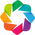

In [3]:
import holoviews as hv
from holoviews import opts
from coding_assignment import TopoProd
import seaborn as sns
import matplotlib.pyplot as plt

hv.extension('bokeh')

## Visualization of Topographic Product for provided SOMs
This section contains the visualizations of the provided datasets containing the pre-trained SOMs which are originating in the SOMToolBox for the chainlink dataset as well as the 10-cluster dataset. The provided input vectors as well as weights are imported and parsed using the SOMToolbox parser. Multiple visualizations are created by adapting the parameter configuration for the visualization. With the topographic product there is only the parameter 'k' which represents the size of the neared neighbours of a unit. Therefore we have chosen the following values for k to compare the outputs of the corresponding visualizations:
- k = 1
- k = 2
- k = 4
- k = |weights| - 1 (number of weights - 1)

For the first visualizations of the topographic product using the pre-trained SOMs we have chosen to compare two different kinds of visualization and color palattes in order to be able extract more information as well as to prevent effects of colour blindness. Later in the report we sticked to grayscale-only so as not to overload the document with redundant visualisations.

### Chainlink TP for pre-trained SOM

#### TP for k=1

In [4]:
# Calculating the topographic product
p = TopoProd(chainlink_weights['ydim'], chainlink_weights['xdim'], chainlink_weights['arr'], k=1)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

# Plotting of the topographic product
h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.Chainlink_TopoProd_P1 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P2 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P3 :Image   [x,y]   (z)

#### TP for k=2

In [5]:
# Calculating the topographic product
p = TopoProd(chainlink_weights['ydim'], chainlink_weights['xdim'], chainlink_weights['arr'], k=2)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

# Plotting of the topographic product
h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.Chainlink_TopoProd_P1 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P2 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P3 :Image   [x,y]   (z)

#### TP for k=4

In [6]:
# Calculating the topographic product
p = TopoProd(chainlink_weights['ydim'], chainlink_weights['xdim'], chainlink_weights['arr'], k=4)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

# Plotting of the topographic product
h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.Chainlink_TopoProd_P1 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P2 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P3 :Image   [x,y]   (z)

#### TP for k = |weights| - 1

In [7]:
# Calculating the topographic product
p = TopoProd(chainlink_weights['ydim'], chainlink_weights['xdim'], chainlink_weights['arr'])

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

# Plotting of the topographic product
h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.Chainlink_TopoProd_P1 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P2 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P3 :Image   [x,y]   (z)

### 10-cluster TP for pre-trained SOM

#### TP for k=1

In [8]:
# Calculating the topographic product
p = TopoProd(ten_cluster_weights['ydim'], ten_cluster_weights['xdim'], ten_cluster_weights['arr'], k=1)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

# Plotting of the topographic product
h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('10-cluster TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('10-cluster TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('10-cluster TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.A_10_hyphen_minus_cluster_TopoProd_P1 :Image   [x,y]   (z)
   .Image.A_10_hyphen_minus_cluster_TopoProd_P2 :Image   [x,y]   (z)
   .Image.A_10_hyphen_minus_cluster_TopoProd_P3 :Image   [x,y]   (z)

#### TP for k=2

In [9]:
# Calculating the topographic product
p = TopoProd(ten_cluster_weights['ydim'], ten_cluster_weights['xdim'], ten_cluster_weights['arr'], k=2)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

# Plotting of the topographic product
h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('10-cluster TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('10-cluster TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('10-cluster TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.A_10_hyphen_minus_cluster_TopoProd_P1 :Image   [x,y]   (z)
   .Image.A_10_hyphen_minus_cluster_TopoProd_P2 :Image   [x,y]   (z)
   .Image.A_10_hyphen_minus_cluster_TopoProd_P3 :Image   [x,y]   (z)

#### TP for k=4

In [10]:
# Calculating the topographic product
p = TopoProd(ten_cluster_weights['ydim'], ten_cluster_weights['xdim'], ten_cluster_weights['arr'], k=4)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

# Plotting of the topographic product
h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('10-cluster TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('10-cluster TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('10-cluster TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.A_10_hyphen_minus_cluster_TopoProd_P1 :Image   [x,y]   (z)
   .Image.A_10_hyphen_minus_cluster_TopoProd_P2 :Image   [x,y]   (z)
   .Image.A_10_hyphen_minus_cluster_TopoProd_P3 :Image   [x,y]   (z)

#### TP for k = |weights| - 1

In [11]:
# Calculating the topographic product
p = TopoProd(ten_cluster_weights['ydim'], ten_cluster_weights['xdim'], ten_cluster_weights['arr'])

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

# Plotting of the topographic product
h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('10-cluster TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('10-cluster TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('10-cluster TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.A_10_hyphen_minus_cluster_TopoProd_P1 :Image   [x,y]   (z)
   .Image.A_10_hyphen_minus_cluster_TopoProd_P2 :Image   [x,y]   (z)
   .Image.A_10_hyphen_minus_cluster_TopoProd_P3 :Image   [x,y]   (z)

## Visualization of Topographic Product for self-trained SOMs
This section contains the visualizations of the provided datasets by using self-trained SOMs of dimensions 10x10 (small) as well as 100x60(large) for the chainlink dataset as well as the 10-cluster dataset. We chose to use the MiniSom library for the SOM training with 10.000 iterations, since in our tests this did not impose large negative effects on the performance of our algorithm. The provided input vectors as well as weights are imported and parsed using the SOMToolbox parser. Multiple visualizations are created by adapting the parameter configuration for the visualization. With the topographic product there is only the parameter 'k' which represents the size of the neared neighbours of a unit. Therefore we have chosen different values for k to compare the outputs of the corresponding visualizations.

In [12]:
from minisom import MiniSom

### Small (10x10) SOM 

#### Chainlink

In [13]:
# Train 10x10 Map for Chainlink Dataset

chainlink_som = MiniSom(10, 10, 3)
chainlink_som.train(chainlink_idata['arr'], 10000)

##### TP for k=1

In [14]:
p = TopoProd(10, 10, chainlink_som._weights, k=1)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.Chainlink_TopoProd_P1 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P2 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P3 :Image   [x,y]   (z)

##### TP for k=2

In [15]:
p = TopoProd(10, 10, chainlink_som._weights, k=2)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.Chainlink_TopoProd_P1 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P2 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P3 :Image   [x,y]   (z)

##### TP for k=4

In [16]:
p = TopoProd(10, 10, chainlink_som._weights, k=4)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.Chainlink_TopoProd_P1 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P2 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P3 :Image   [x,y]   (z)

##### TP for k = |weights| - 1

In [17]:
p = TopoProd(10, 10, chainlink_som._weights)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.Chainlink_TopoProd_P1 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P2 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P3 :Image   [x,y]   (z)

#### 10-cluster

In [18]:
# Train 10x10 Map for 10-Clusters Dataset

ten_cluster_som = MiniSom(10, 10, 10)
ten_cluster_som.train(ten_cluster_idata['arr'], 10000)

##### TP for k=1

In [19]:
p = TopoProd(10, 10, ten_cluster_som._weights, k=1)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.TopoProd_P1 :Image   [x,y]   (z)
   .Image.TopoProd_P2 :Image   [x,y]   (z)
   .Image.TopoProd_P3 :Image   [x,y]   (z)

##### TP for k=2

In [20]:
p = TopoProd(10, 10, ten_cluster_som._weights, k=2)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.TopoProd_P1 :Image   [x,y]   (z)
   .Image.TopoProd_P2 :Image   [x,y]   (z)
   .Image.TopoProd_P3 :Image   [x,y]   (z)

##### TP for k=4

In [21]:
p = TopoProd(10, 10, ten_cluster_som._weights, k=4)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.TopoProd_P1 :Image   [x,y]   (z)
   .Image.TopoProd_P2 :Image   [x,y]   (z)
   .Image.TopoProd_P3 :Image   [x,y]   (z)

##### TP for k = |weights| - 1

In [22]:
p = TopoProd(10, 10, ten_cluster_som._weights)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.TopoProd_P1 :Image   [x,y]   (z)
   .Image.TopoProd_P2 :Image   [x,y]   (z)
   .Image.TopoProd_P3 :Image   [x,y]   (z)

### Large (100x60) SOM 

#### Chainlink

In [23]:
# Train 100x60 Map for Chainlink Dataset

chainlink_som = MiniSom(100, 60, 3)
chainlink_som.train(chainlink_idata['arr'], 10000)

##### TP for k=1

In [24]:
p = TopoProd(100, 60, chainlink_som._weights, k=1)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.Chainlink_TopoProd_P1 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P2 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P3 :Image   [x,y]   (z)

##### TP for k=2

In [25]:
p = TopoProd(100, 60, chainlink_som._weights, k=2)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

:Layout
   .Image.Chainlink_TopoProd_P1 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P2 :Image   [x,y]   (z)
   .Image.Chainlink_TopoProd_P3 :Image   [x,y]   (z)

##### TP for k=4

In [26]:
p = TopoProd(100, 60, chainlink_som._weights, k=2)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

KeyboardInterrupt: 

##### TP for k = |weights| - 1

In [ ]:
p = TopoProd(100, 60, chainlink_som._weights)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('Chainlink TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('Chainlink TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('Chainlink TopoProd P3').opts(cmap='gray'),
])

#### 10-cluster

In [ ]:
# Train 100x60 Map for 10-Clusters Dataset

ten_cluster_som = MiniSom(100, 60, 10)
ten_cluster_som.train(ten_cluster_idata['arr'], 10000)

##### TP for k=1

In [ ]:
p = TopoProd(100, 60, ten_cluster_som._weights, k=1)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('10-cluster TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('10-cluster TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('10-cluster TopoProd P3').opts(cmap='gray'),
])

##### TP for k=2

In [ ]:
p = TopoProd(100, 60, ten_cluster_som._weights, k=2)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('10-cluster TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('10-cluster TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('10-cluster TopoProd P3').opts(cmap='gray'),
])

##### TP for k=4

In [ ]:
p = TopoProd(100, 60, ten_cluster_som._weights, k=4)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('10-cluster TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('10-cluster TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('10-cluster TopoProd P3').opts(cmap='gray'),
])

##### TP for k = |weights| - 1

In [ ]:
p = TopoProd(100, 60, ten_cluster_som._weights)

p1 = p[..., 0] # Distortion in input space
p2 = p[..., 1] # Distortion in output space
p3 = p[..., 2] # Geometric mean between p1 and p2

h_p1 = hv.Image(p1).opts(xaxis=None, yaxis=None)
h_p2 = hv.Image(p2).opts(xaxis=None, yaxis=None)
h_p3 = hv.Image(p3).opts(xaxis=None, yaxis=None)

hv.Layout([
    h_p1.relabel('10-cluster TopoProd P1').opts(cmap='gray'),
    h_p2.relabel('10-cluster TopoProd P2').opts(cmap='gray'),
    h_p3.relabel('10-cluster TopoProd P3').opts(cmap='gray'),
])

## Validation of correctness

In order to validate, whether or not our implementation of the calculation as well as visualization of the topographic product ist correct, we compared our outcome with the results of the Java SOMToolBox (0.7.5-4 svn4367). To make the validation reproducible we compared our visualizations for the provided SOMs for the Chainlink dataset as well as the 10-cluster dataset.

### Comparison with Java SOMToolBox topgraphic product
While comparing our visualizations with the ones created by the Java SOMToolBox, we found that the results of the Java SOMViewer for the pre-trained SOM were not deterministic in that it returned different visualizations of the topographic product when executed multiple times. We used the following configuration for the experiment:

- SDK: Java 11
- Javav SOMToolBox Version: 0.7.5-4 svn4367

We executed the SOMViewer with the following command for the chainlink dataset (and the 10-cluster dataset accordingly), using the provided files which we downloaded from http://www.ifs.tuwien.ac.at/dm/somtoolbox/datasets.html

```
java at.tuwien.ifs.somtoolbox.apps.viewer.SOMViewer 
    -u datasets\chainlink\chainlink.unit
    -w datasets\chainlink\chainlink.wgt
    -v datasets\chainlink\chainlink.vec
    -t datasets\chainlink\chainlink.tv
    -c datasets\chainlink\chainlink.cls
    -m datasets\chainlink\chainlink.map
```


We then used the user interface of the SOMViewer to generate the visualizations for the topographic error with different values for 'k'. We executed the same visualizations multiple times for each configuration of 'k' (1, 2, 4). 
Furthermore, after each execution of the topographic product, we cleared the tool's visualization cache in order to avoid unwanted side effects. To cross check on the behaviour of the tool with regards to other visualizations we tested various visualizations in the same manner (with the same input files), which were all deterministic. This brings us to the assumption that there might be some algorithmic error in the Java implementation of the topographic product of the Java SOMToolBox.

The following visualization results of the topographic product when using the Java SOMToolBox were executed on static data and parameter configuration multiple times with different outcome:

<table style="text-align: center">
  <tr>
    <th style="text-align: center" colspan="2">Java SOMViewer Chainlink TP for k = 2</th>
  </tr>
  <tr>
    <td><img width="300px" src="./visualizations/Java_SOMToolBox_reference_visualizations/chainlink/JavaSOMTool_visualization_chainlink_TopographicProduct_k2_a.png"></td>
    <td><img width="300px" src="./visualizations/Java_SOMToolBox_reference_visualizations/chainlink/JavaSOMTool_visualization_chainlink_TopographicProduct_k2_b.png"></td>
  </tr>
  <tr>
    <th style="text-align: center" colspan="2">Java SOMViewer Chainlink TP for k = 4</th>
  </tr>
  <tr>
    <td><img width="300px" src="./visualizations/Java_SOMToolBox_reference_visualizations/chainlink/JavaSOMTool_visualization_chainlink_TopographicProduct_k4_a.png"></td>
    <td><img width="300px" src="./visualizations/Java_SOMToolBox_reference_visualizations/chainlink/JavaSOMTool_visualization_chainlink_TopographicProduct_k4_b.png"></td>
  </tr>
  <tr>
    <th style="text-align: center" colspan="2">Java SOMViewer 10-cluster TP for k = 2</th>
  </tr>
  <tr>
    <td><img width="300px" src="./visualizations/Java_SOMToolBox_reference_visualizations/10-cluster/JavaSOMTool_visualization_10-Cluster_TopographicProduct_k2_a.png"></td>
    <td><img width="300px" src="./visualizations/Java_SOMToolBox_reference_visualizations/10-cluster/JavaSOMTool_visualization_10-Cluster_TopographicProduct_k2_b.png"></td>
  </tr>
  <tr>
    <th style="text-align: center" colspan="2">Java SOMViewer 10-cluster TP for k = 4</th>
  </tr>
  <tr>
    <td><img width="300px" src="./visualizations/Java_SOMToolBox_reference_visualizations/10-cluster/JavaSOMTool_visualization_10-Cluster_TopographicProduct_k4_a.png"></td>
    <td><img width="300px" src="./visualizations/Java_SOMToolBox_reference_visualizations/10-cluster/JavaSOMTool_visualization_10-Cluster_TopographicProduct_k4_b.png"></td>
  </tr>
 </table>

 While there are clear visible similatities, the results of two different runs on the same data return a different visualization.

### Evaluation of the visualizations

Adapting the parameter 'k' leads to changes in the granularity of the structural evaluation by the SOM. Low values (e.g. k=1) mean that topographical structures can only be mapped in a locally limited area, while a higher value of k shows more details about the topographical differences in the neighbourhood. This is particularly visible in the uni-color areas in the visualised heat maps, which represent homogeneous value of the topographical product. Since a low resulting value (towards 0) of the topographical product means an optimal representation of the neighbourhood, you will find larger uni-color areas at low 'k' values than at higher k values.
However, as you can see, very large values of 'k' (e.g. number of all other weights) do not provide a satisfactory result in some cases either, as a large amount of detailed information is lost here too.